In [5]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300

# Basic Monte Carlo techniques
## Calculating $\pi$

When we use Monte Carlo to perform a molecular simulation, we are
actually evaluating a configurational integral or partition
function. In mathematics, Monte Carlo is a common numerical algorithm
to compute integrals (or the volume under a function), using random
numbers instead of a regular grid. As a first example, we will use
Monte Carlo to estimate $\pi$.

Consider a circle of diameter $d$ surrounded by a square of length $l$
($l \geq d$). Random coordinates within the square are generated. The
value of $\pi$ can be calculated from the fraction of points that fall
within the circle.

<img src="https://i.postimg.cc/d0LqnQ1P/pi-figure.png" width="400" height="400"/>

*A circle of diameter $d$ surrounded by a square of length $l$ ($l \geq d$).*

1. How can $\pi$ be calculated from the fraction of points that
fall in the circle? 
Write a Monte Carlo program to calculate $\pi$ using
this method.
Remark: the ``exact'' value of $\pi$ can be obtained by running `from math import pi`.

In [3]:
def compute_pi(length: float, diameter: float, trials: int):
    samples = np.random.random((trials, 2))
    samples[:, 0] *= length
    samples[:, 1] *= length
    samples[:, 0] -= length / 2
    samples[:, 1] -= length / 2
    samples = np.square(samples)
    samples = np.sum(samples, axis=1)
    samples = np.sqrt(samples)
    samples = samples < (diameter / 2)
    inside = np.sum(samples)
    # p = inside / trials = pi *diameter^2 / 4 / (length * length)
    return inside / trials * (length * length) / (diameter ** 2)*4


def main():
    # the less difference, the higher accuracy
    length = 10
    diameter = 10
    trials = int(1e8)
    
    my_pi = compute_pi(length, diameter, trials)
    
    print(
        f'''System pi: {math.pi}
    MC pi: {my_pi}'''
    )
    
if __name__=="__main__":
    main()

System pi: 3.141592653589793
    MC pi: 3.14150616


2. How would you expect that the accuracy and precision of the result depends on the ratio $l/d$ and the number of generated coordinates? 

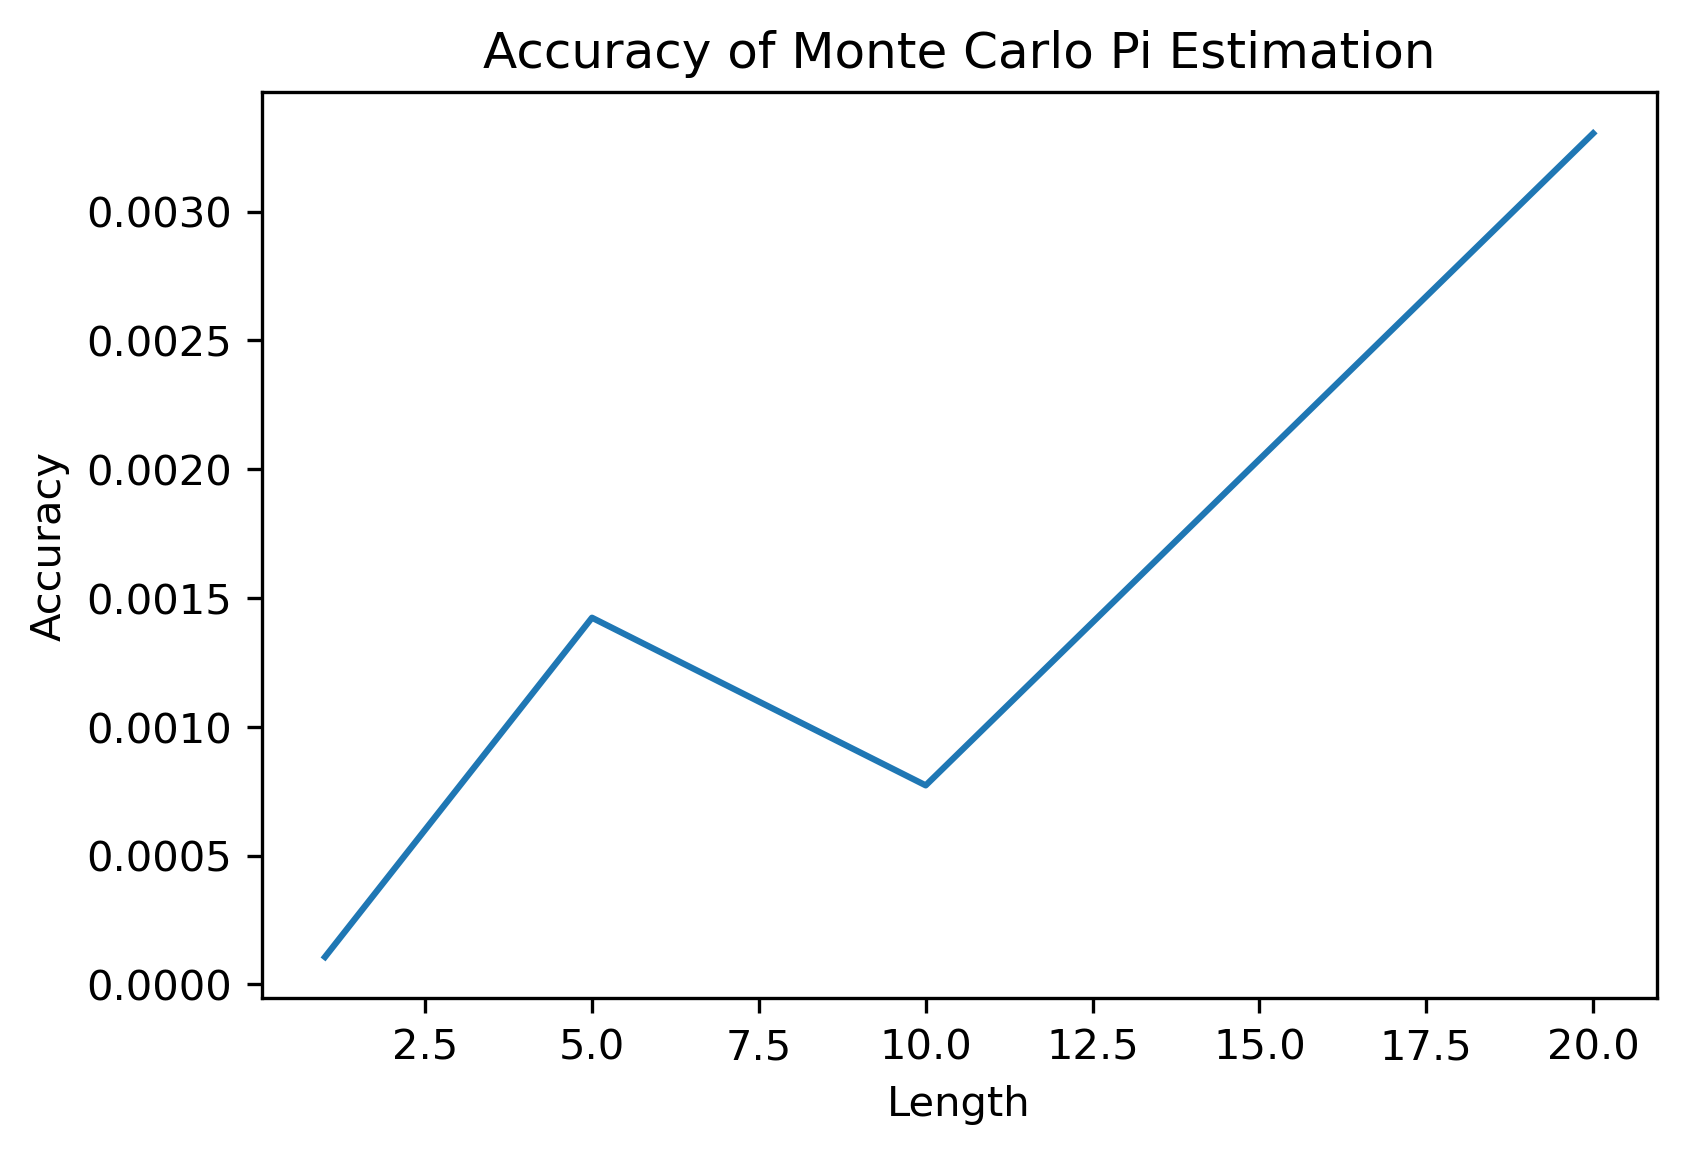

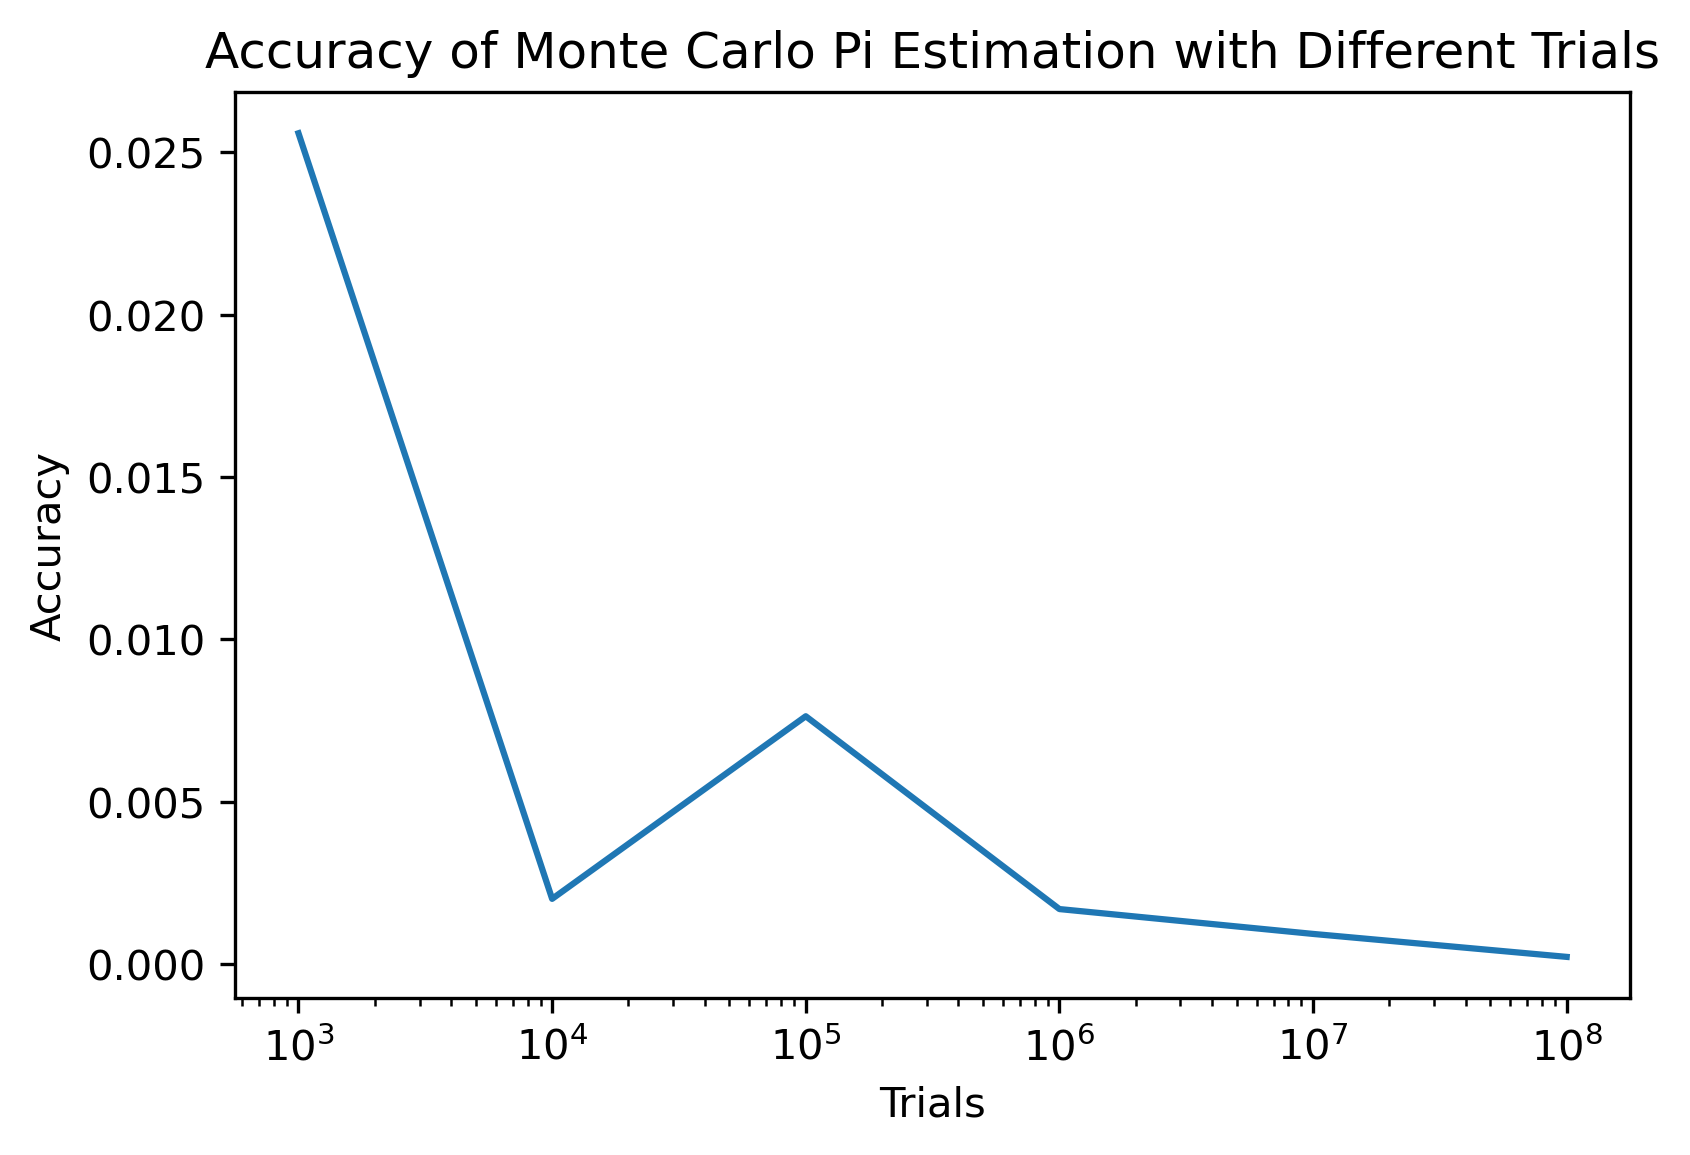

In [6]:
# generate different pi values by changing the ratio and number of trials
trials = [int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]
lengths = [1,5,10,20]
diameter = 1

accuracies = []
for length in lengths:
    my_pi = compute_pi(length, diameter, trials[-1])
    accuracies.append(abs(my_pi - math.pi))

plt.plot(lengths, accuracies)
plt.xlabel('Length')
plt.ylabel('Accuracy')
plt.title('Accuracy of Monte Carlo Pi Estimation')

plt.figure(2)
# plot the accuracy of different trials
# 绝对值差
accuracies = []
for trial in trials:
    my_pi = compute_pi(lengths[0], diameter, trial)
    accuracies.append(abs(my_pi - math.pi))
plt.plot(trials, accuracies)
plt.xlabel('Trials')
plt.ylabel('Accuracy')
plt.title('Accuracy of Monte Carlo Pi Estimation with Different Trials')
plt.xscale('log')
plt.show()

3. Derive a formula to calculate the relative standard deviation (*i.e.*, the standard deviation divided by the mean) of
  the estimate of $\pi$. Is there an optimal ratio $l/d$? Compare the analytical value with that from a numerical simulation.

<span style="color:red">
Hint 1: the distribution of successful hits is binomial.

Hint 2: you can calculate the standard deviation of an array with `numpy.std`.
</span>

# derivation
p = pi/4 * (d/l)**2
二项分布，观测量x，
var(x) = p(1-p)/Trial

pi_est=4 * (x/Trial) * (l/d)**2
std(pi_est) = 4 * (l/d)**2 * sqrt(p(1-p)/Trial)

Length: 1, Mean Accuracy: 3.14176232, Std Accuracy: 0.01653275210657923
Length: 2, Mean Accuracy: 3.1417919999999997, Std Accuracy: 0.06393627627567937
Length: 5, Mean Accuracy: 3.14206, Std Accuracy: 0.17372609590962435
Length: 10, Mean Accuracy: 3.1401280000000003, Std Accuracy: 0.3504775936005039
Length: 20, Mean Accuracy: 3.157776, Std Accuracy: 0.7098819154084712


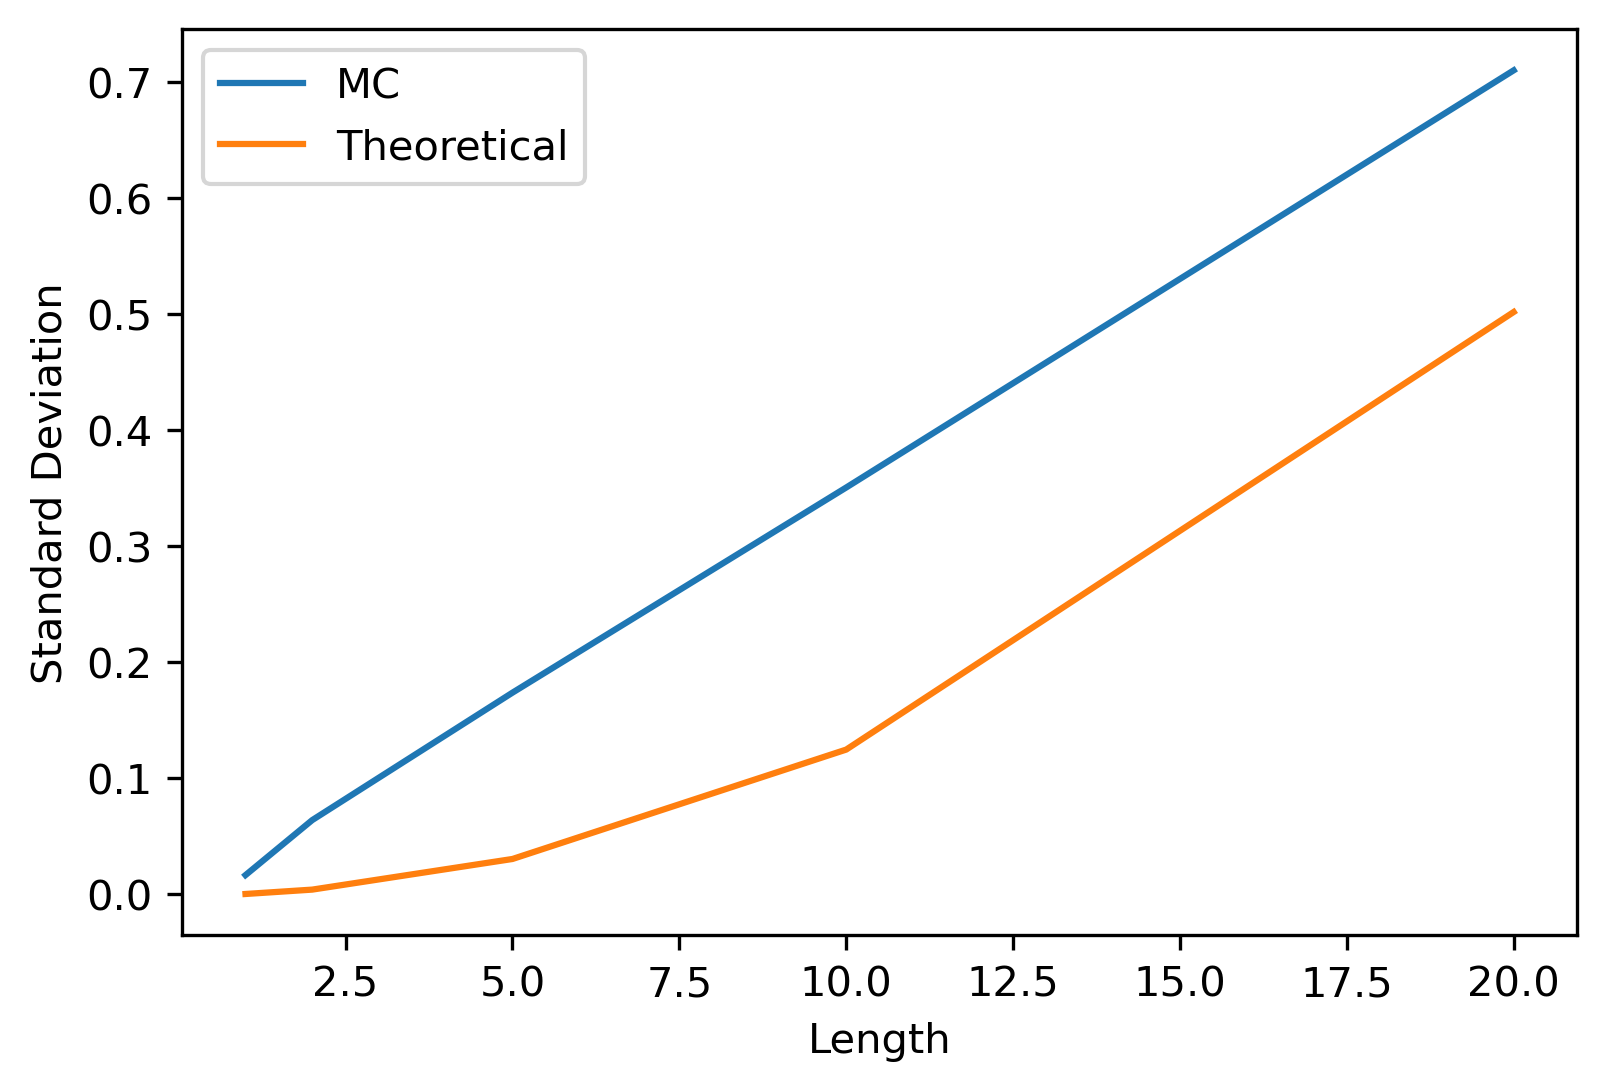

In [7]:
# generate different pi values by changing the ratio and number of trials
trials = int(1e4)
lengths = [1,2,5,10,20]
diameter = 1
num_each_epoch = 10000
std_all = []

for length in lengths:
    accuracies = []
    # calculate pi for 
    for i in range(num_each_epoch):
        my_pi = compute_pi(length, diameter, trials)
        accuracies.append(my_pi)
    # calculate the average accuracy and standard deviation
    accuracies = np.array(accuracies)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    std_all.append(std_accuracy)
    print(f'Length: {length}, Mean Accuracy: {mean_accuracy}, Std Accuracy: {std_accuracy}')

# plot the std vs length
plt.figure(3)
plt.plot(lengths, std_all)
plt.xlabel('Length')
plt.ylabel('Standard Deviation')

# hear theoretical std
ratio = np.array(diameter / np.array(lengths))
theoretical_std = (4*np.pi/(ratio**2)-np.pi**2)/trials
plt.plot(lengths, theoretical_std)
plt.xlabel('Length')
plt.ylabel('Standard Deviation')
plt.legend(['MC', 'Theoretical'])

Trial: 1000, Mean Accuracy: 3.1438120000000005, Std Accuracy: 0.04967877470308626
Trial: 10000, Mean Accuracy: 3.1411552, Std Accuracy: 0.016370673564639913
Trial: 100000, Mean Accuracy: 3.141397, Std Accuracy: 0.0053135734680156595
Trial: 1000000, Mean Accuracy: 3.14157106, Std Accuracy: 0.0016103768392522297


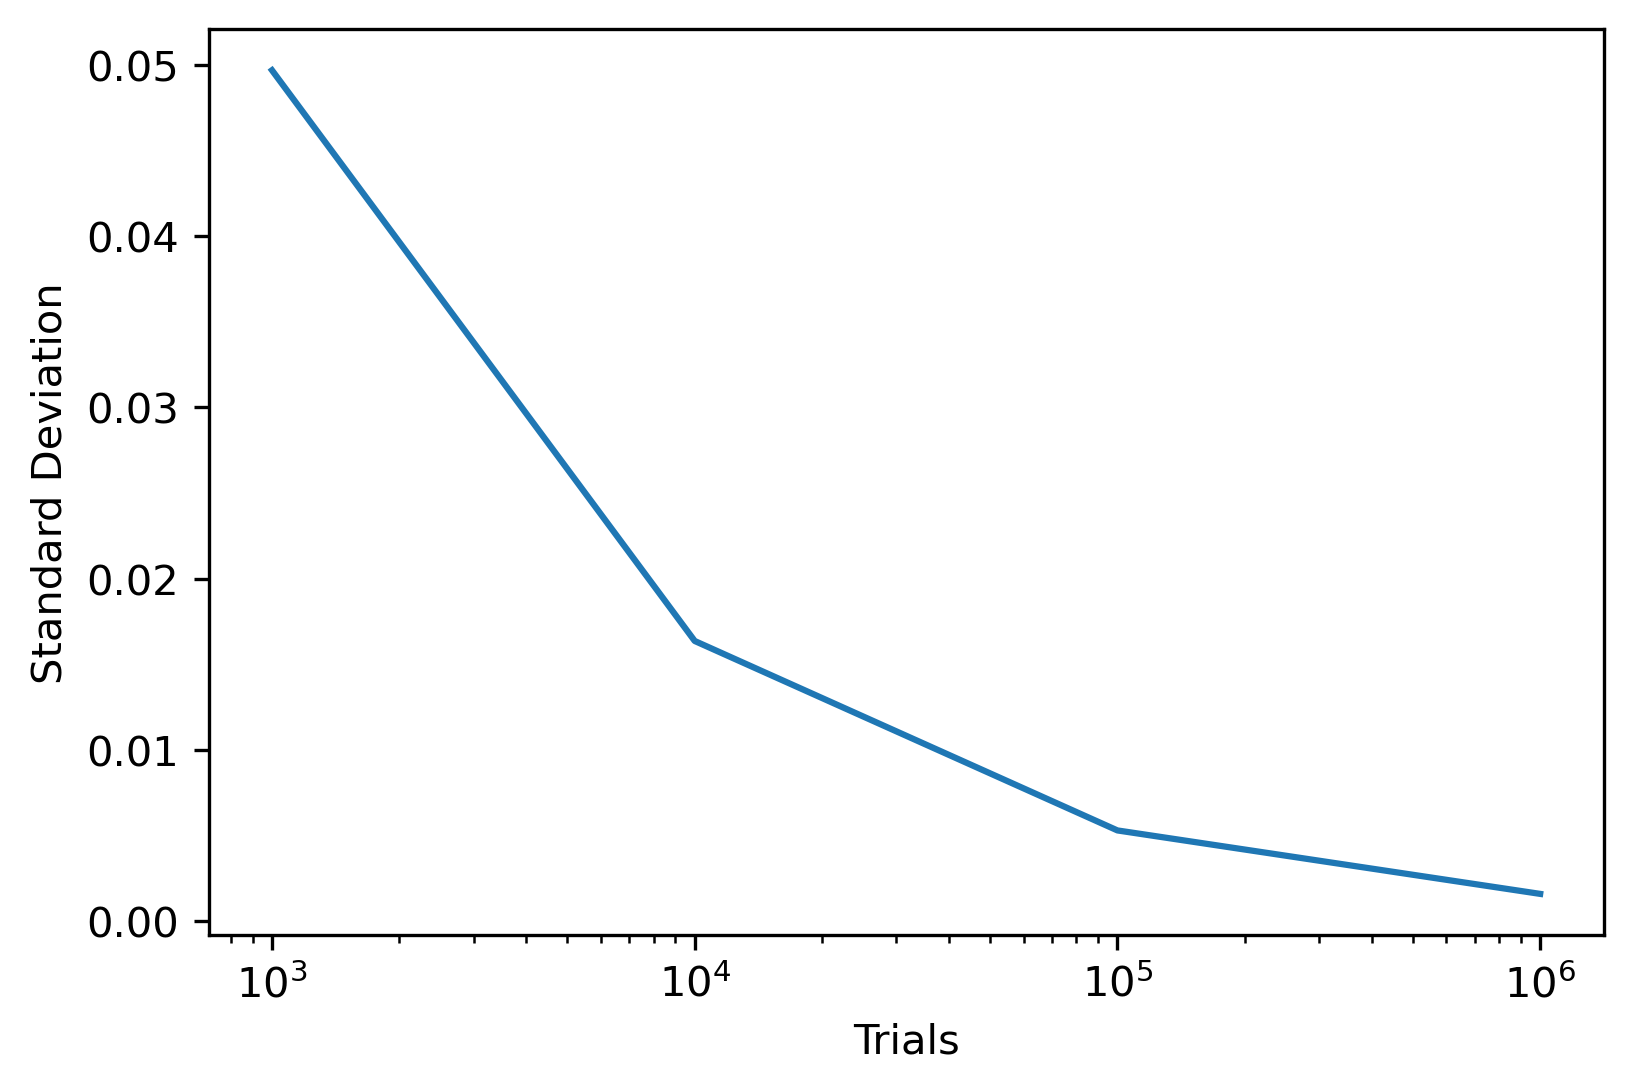

In [8]:
# generate different std vs trials
trials = [int(1e3), int(1e4), int(1e5), int(1e6)]
lengths = 1
diameter = 1
num_each_epoch = 1000
std_all = []
for trial in trials:
    accuracies = []
    # calculate pi for 
    for i in range(num_each_epoch):
        my_pi = compute_pi(lengths, diameter, trial)
        accuracies.append(my_pi)
    # calculate the average accuracy and standard deviation
    accuracies = np.array(accuracies)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    std_all.append(std_accuracy)
    print(f'Trial: {trial}, Mean Accuracy: {mean_accuracy}, Std Accuracy: {std_accuracy}')
# plot the std vs trials
plt.figure(4)
plt.plot(trials, std_all)
plt.xlabel('Trials')
plt.ylabel('Standard Deviation')
plt.xscale('log')

4. Is it a good idea to calculate many decimals of $\pi$ using this
method?

In [ ]:
收敛速度太慢